In [1]:
import cv2
import os
import time
import numpy as np
import random
from os import listdir
from os.path import isdir
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
detector = MTCNN()

Using TensorFlow backend.


In [2]:
# load images and extract faces for all images in a directory
def load_videos(directory):
    videos,vid_names = list(),list()
    # enumerate files
    for filename in listdir(directory):
        # path
        temp = filename.split('.')
        vid_names.append(temp[0])
        path = directory + filename
        # store
        videos.append(path)
    return videos,vid_names

In [3]:
PATH = os.getcwd()+'\\input_videos\\'
if (not os.path.isdir(PATH)):
    os.mkdir(PATH)

In [4]:
videos,vid_nms = load_videos(PATH)
# print(videos)
# print(vid_names)
# vid_name = input('Enter media file name with extension : ')
# user_name = input('Enter name for file : ')

In [5]:
# nms = list()
# vid_names = list()
# for i in vid_nms:
#     temp = list(i.split('_'))
#     temp1 = temp[0]+temp[1]
#     nms.append(temp1)
#     vid_names.append(temp[0]+' '+temp[1]+' - '+temp[2])
#     print(vid_names)
vid_names = vid_nms
# np.savetxt("names.txt", np.array(nms), fmt="%s")
# np.savetxt("vid_names.txt", np.array(vid_names), fmt="%s")

['Aditya_Shankar_B247', 'Ritesh_Kulkarni_B270', 'Shashwat_Tare_B250']


In [6]:
for user_name in vid_names:
    test_faces_path1 = os.getcwd()+'\\dataset\\train\\'+user_name
    test_faces_path2 = os.getcwd()+'\\dataset\\val\\'+user_name
    check = os.path.isdir(test_faces_path1)
    if (not check):
        os.mkdir(test_faces_path1)
    check = os.path.isdir(test_faces_path2)
    if (not check):
        os.mkdir(test_faces_path2)

In [7]:
# draw each face separately
def draw_box(data, faces, path ,username ,z):
    for i in range(len(faces)):
        # get coordinates
        x1, y1, width, height = faces[i]['box']
        x2, y2 = x1 + width, y1 + height
        
        # define subplot
        plt.subplot(1, len(faces), i+1)
        plt.axis('off')
        
        # check if directory is present or not - if not then creates one
        filename = user_name+str(z)+'.jpg'
#         image = data[y1:y2, x1:x2]
#         image = image.resize((160, 160))
        #writes the detected faces in specified directory
        cv2.imwrite( path+'\\'+filename , data[y1:y2, x1:x2])
#         print('Saved',filename)

In [8]:
def getFrame(sec,i,j,path1,path2,user_name): 
    vallist = random.sample(range(0, 20), 5)
    
    vidcap = cv2.VideoCapture(videos[j])
    vidcap.set(cv2.CAP_PROP_POS_MSEC,sec*1000) 
    hasFrames,image = vidcap.read() 
    
    pixels = image
    # detect faces in the image
    faces = detector.detect_faces(pixels)
    
    if hasFrames:
#         print('detecting face from image => ',i)
        if i in vallist:
            draw_box(image ,faces ,path2 ,user_name,i)
#             cv2.imwrite(path2+'\\'+user_name+str(i)+".jpg", image) 
        draw_box(image ,faces ,path1 ,user_name,i)
#             cv2.imwrite(path1+'\\'+user_name+str(i)+".jpg", image)
    else:
        pass
            
    return hasFrames

Aditya_Shankar_B247
detecting face from image =>  0
Saved Aditya_Shankar_B2470.jpg
detecting face from image =>  0
Saved Aditya_Shankar_B2470.jpg
Saved Aditya_Shankar_B2470.jpg


C:\Users\samkit\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


detecting face from image =>  1
Saved Aditya_Shankar_B2471.jpg
Saved Aditya_Shankar_B2471.jpg
detecting face from image =>  2
Saved Aditya_Shankar_B2472.jpg
detecting face from image =>  3
Saved Aditya_Shankar_B2473.jpg
detecting face from image =>  4
Saved Aditya_Shankar_B2474.jpg
detecting face from image =>  5
detecting face from image =>  6
detecting face from image =>  7
Saved Aditya_Shankar_B2477.jpg
detecting face from image =>  8
Saved Aditya_Shankar_B2478.jpg
Saved Aditya_Shankar_B2478.jpg
detecting face from image =>  9
Saved Aditya_Shankar_B2479.jpg
detecting face from image =>  10
Saved Aditya_Shankar_B24710.jpg
detecting face from image =>  11
Saved Aditya_Shankar_B24711.jpg
detecting face from image =>  12
Saved Aditya_Shankar_B24712.jpg
Saved Aditya_Shankar_B24712.jpg
detecting face from image =>  13
detecting face from image =>  14
detecting face from image =>  15
detecting face from image =>  16
Saved Aditya_Shankar_B24716.jpg
detecting face from image =>  17
Saved Adi

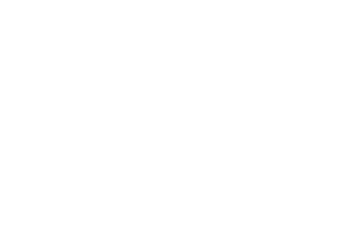

In [11]:
for j in range(len(vid_names)):
    print(vid_names[j])
    path1 = os.getcwd()+'\\dataset\\train\\'+vid_names[j]
    path2 = os.getcwd()+'\\dataset\\val\\'+vid_names[j]
    sec = 0 
    i = 0
    frameRate = 0.5 #it will capture image in each 0.5 second 
    user_name = vid_names[j]
    success = getFrame(sec,i,j,path1,path2,user_name) 
    while (success and i<20): 
        sec = sec + frameRate 
        sec = round(sec, 2) 
        success = getFrame(sec,i,j,path1,path2,user_name)
#         print(success,'--------',i,'------',sec)
        i+=1